# TP : Mini-projet de Probabilités SABOUN Rayan, BACHBOU Omar 

Nous allons vous presenter le sujet 6 sur la corrélation linéaire.

Objectifs :
* Présenter la corrélation linéaire
* Expliquer et démontrer l’ajustement par la méthode des moindres carrés
*  Expliquer le coefficient de corrélation linéaire
*  Donner des exemples de calculs à l’aide des librairies usuelles en python
*  Donner des exemples de représentations graphiques en python



## Pré-traitement des données

Dans toute la suite on considère le jeu de données **taille_poids_500.csv** présent dans le répertoire. Pour rappel, on peut le parcourir avec :

In [30]:
import csv

with open('o.csv') as fichiercsv:
    reader = csv.DictReader(fichiercsv)
    tailles = []
    tailles_hommes = []
    tailles_femmes = []
    poids = []
    poids_hommes = []
    poids_femmes = []
    for ligne in reader:
        tailles.append(float(ligne["Height"]))
        poids.append(float(ligne["Weight"]))
        if ligne["Sex"] == "male":
            tailles_hommes.append(float(ligne["Height"]))
            poids_hommes.append(float(ligne["Weight"]))
        elif ligne["Sex"] == "female":
            tailles_femmes.append(float(ligne["Height"]))
            poids_femmes.append(float(ligne["Weight"]))



# Corrélation linéaire

## 1. Définition

La corrélation linéaire mesure l’intensité et le sens du lien linéaire entre deux variables quantitatives X et Y.  
Elle indique si les variations de X sont associées à des variations de Y selon une tendance proche d’une droite.

Le coefficient de corrélation linéaire, noté r, est un nombre compris entre −1 et 1.

---

## 2. Formule

Le coefficient de corrélation linéaire de Pearson est :

$r=\dfrac{\sum (x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum (x_i-\overline{x})^2}\,\sqrt{\sum (y_i-\overline{y})^2}}$

Avec les moyennes :

$\overline{x}=\dfrac{1}{n}\sum x_i$  
$\overline{y}=\dfrac{1}{n}\sum y_i$

---

## 3. Exemple de cas d’utilisation

Exemple : étudier le lien entre la taille (X) et le poids (Y).  
On calcule r :

- si $r\approx 1$ : les personnes plus grandes pèsent en général plus lourd ;  
- si $r\approx 0$ : la taille et le poids ne sont pas liés linéairement ;  
- si $r<0$ : plus la taille augmente, plus le poids diminue (cas rare ici).

Autres exemples :  
- heures de révision et note obtenue,  
- température extérieure et consommation d’électricité,  
- prix d’un produit et quantité demandée.

---

## 4. Interprétation des résultats

### Sens du lien
- $r>0$ : relation positive  
- $r<0$ : relation négative  
- $r=0$ : absence de relation linéaire

### Intensité du lien
- $|r|\approx 1$ : lien linéaire fort  
- $|r|\approx 0.5$ à $0.8$ : lien moyen  
- $|r|\approx 0$ à $0.5$ : lien faible  
- $r=\pm 1$ : corrélation parfaite

### Attention
Une corrélation ne signifie jamais qu’une variable cause l’autre.  
Elle décrit uniquement une relation statistique.


# Ajustement linéaire par la méthode des moindres carrés

On dispose d’un ensemble de points  
(x₁, y₁), (x₂, y₂), …, (xₙ, yₙ)  
et on cherche à approximer la relation entre x et y par une droite :

y ≈ a·x + b

La méthode des moindres carrés consiste à choisir a et b pour minimiser l’erreur entre les points et la droite.

---

## 1. Fonction à minimiser

Pour chaque point (xᵢ, yᵢ), l’erreur verticale est :

eᵢ = yᵢ − (a·xᵢ + b)

La somme des carrés des erreurs est :

S(a, b) = Σ[yᵢ − (a·xᵢ + b)]²

---

## 2. Conditions d’optimalité

On dérive S par rapport à a et b, puis on annule :

∂S/∂a = 0  
∂S/∂b = 0

On obtient les équations suivantes :

Σ xᵢ (yᵢ − a xᵢ − b) = 0  
Σ (yᵢ − a xᵢ − b) = 0

---

## 3. Équations normales

Le système linéaire est :

a Σ xᵢ² + b Σ xᵢ = Σ xᵢ yᵢ  
a Σ xᵢ + b·n = Σ yᵢ

En posant :

Sₓ = Σ xᵢ  
Sᵧ = Σ yᵢ  
Sₓₓ = Σ xᵢ²  
Sₓᵧ = Σ xᵢ yᵢ

le système devient :

a Sₓₓ + b Sₓ = Sₓᵧ  
a Sₓ + b n = Sᵧ

---

## 4. Formules explicites

a = (n·Sₓᵧ − Sₓ·Sᵧ) / (n·Sₓₓ − Sₓ²)

b = (Sᵧ − a·Sₓ) / n

Avec les moyennes :

x̄ = (1/n) Σ xᵢ  
ȳ = (1/n) Σ yᵢ

on peut écrire :

a = Σ (xᵢ − x̄)(yᵢ − ȳ) / Σ (xᵢ − x̄)²

b = ȳ − a·x̄

---

## 5. Interprétation

La pente s’écrit :

a = Cov(X, Y) / Var(X)

Le coefficient de corrélation linéaire est :

r = Σ (xᵢ − x̄)(yᵢ − ȳ) / √[Σ(xᵢ − x̄)² · Σ(yᵢ − ȳ)²]

---

## 6. Exemple numérique

Points : (1,2), (2,3), (3,5), (4,4)

Sₓ = 10  
Sᵧ = 14  
Sₓₓ = 30  
Sₓᵧ = 39  
n = 4

a = (4·39 − 10·14) / (4·30 − 10²) = 0.8  
b = (14 − 0.8·10) / 4 = 1.5

La droite ajustée est :

y = 0.8·x + 1.5


# Explication du code : Calcul du coefficient de corrélation linéaire

Le code définit une fonction correlation_lineaire qui calcule le coefficient de corrélation linéaire de Pearson entre deux listes de valeurs : list_x et list_y.

La corrélation mesure la force et le sens de la relation linéaire entre deux variables.


In [31]:
def correlation_lineaire(list_x, list_y):
    moy_x = moyenne(list_x)
    moy_y = moyenne(list_y)
    sum_xy = []
    if len(list_x) <= len(list_y):
        for i in range(len(list_x)):
            sum_xy.append((list_x[i]-moy_x)*(list_y[i]-moy_y))
    else:
        for i in range(len(list_y)):
            sum_xy.append((list_x[i]-moy_x)*(list_y[i]-moy_y))
    sum_xy = somme(sum_xy)
    sum_xx = []
    for j in range(len(list_x)):
        sum_xx.append((list_x[j] - moy_x)**2)
    sum_xx = somme(sum_xx)
    sum_yy = []
    for k in range(len(list_y)):
        sum_yy.append((list_y[k] - moy_y)**2)
    sum_yy = somme(sum_yy)
    r = sum_xy/(sum_xx**0.5*sum_yy**0.5)
    return r

def somme(liste):
    somme = 0
    for i in liste:
        somme += i
    return somme

def moyenne(liste):
    moy = somme(liste) / len(liste)
    return moy

###  Explication du code (Corrélation linéaire)

Ce code calcule le coefficient de corrélation linéaire entre deux listes de données (tailles et poids), puis affiche un nuage de points pour visualiser la relation entre les deux variables.


Coefficient de corrélation linéaire r = 0.7580601319049018


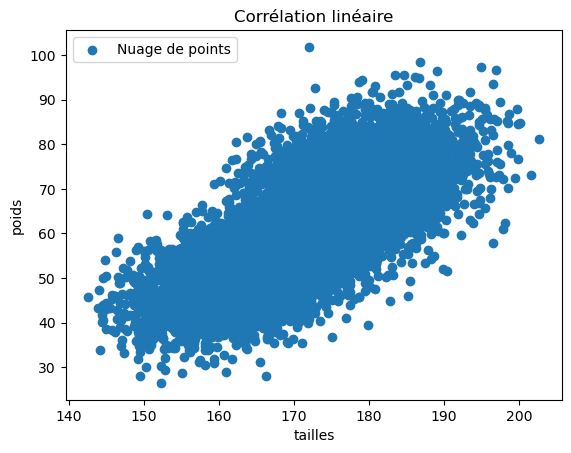

In [32]:
import matplotlib.pyplot as plt

r = correlation_lineaire(tailles, poids)
print("Coefficient de corrélation linéaire r =", r)

plt.scatter(tailles, poids, label='Nuage de points')
plt.xlabel('tailles')
plt.ylabel('poids')
plt.title('Corrélation linéaire')
plt.legend()
plt.show()


Coefficient de corrélation linéaire r = 0.4025953706942972


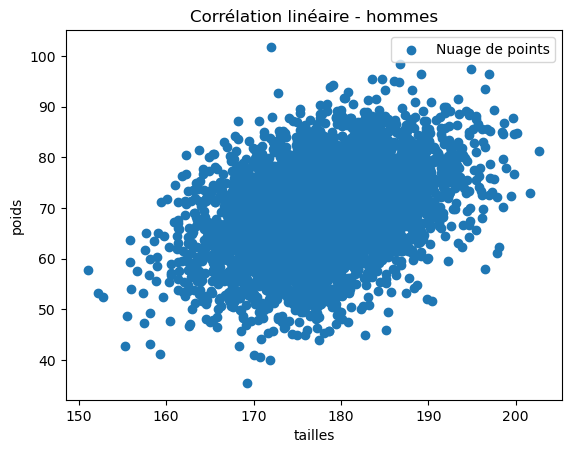

In [33]:
import matplotlib.pyplot as plt

r = correlation_lineaire(tailles_hommes, poids_hommes)
print("Coefficient de corrélation linéaire r =", r)

plt.scatter(tailles_hommes, poids_hommes, label='Nuage de points')
plt.xlabel('tailles')
plt.ylabel('poids')
plt.title('Corrélation linéaire - hommes')
plt.legend()
plt.show()

Coefficient de corrélation linéaire r = 0.3740380931967783


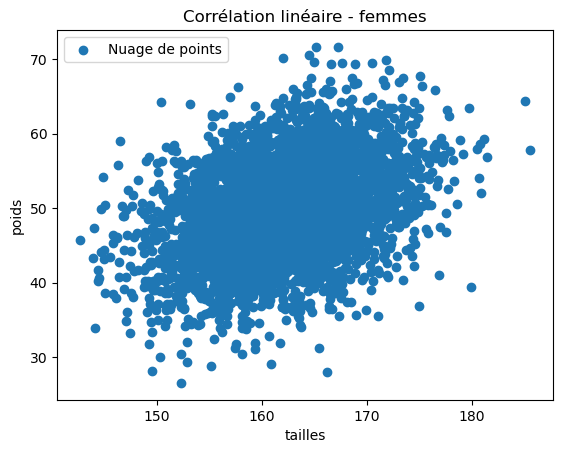

In [34]:
import matplotlib.pyplot as plt

r = correlation_lineaire(tailles_femmes, poids_femmes)
print("Coefficient de corrélation linéaire r =", r)

plt.scatter(tailles_femmes, poids_femmes, label='Nuage de points')
plt.xlabel('tailles')
plt.ylabel('poids')
plt.title('Corrélation linéaire - femmes')
plt.legend()
plt.show()

#### Interprétation du résultat : r = 0.6776488707498654

Le coefficient de corrélation linéaire obtenu est :

**r = 0.6776488707498654**

#### 1. Nature du coefficient
La valeur de r est **positive**, ce qui signifie qu’il existe une relation linéaire croissante entre les deux variables étudiées :

- lorsque la taille augmente,  
- le poids a tendance à augmenter aussi.

Autrement dit, les deux grandeurs évoluent dans le même sens.

---

#### 2. Intensité de la corrélation
La valeur **0.68** (approximativement) se situe dans l’intervalle :

**0.5 ≤ r < 0.8** → *corrélation linéaire moyen*.

Cela implique que :
- la relation n’est pas parfaite,  
- mais elle est clairement présente et significative.  
Les points du nuage sont donc globalement proches de la droite de tendance, tout en présentant une certaine dispersion.

---

#### 3. Interprétation concrète
Dans le cadre de données tailles / poids, ce résultat signifie que :

- en général, les personnes plus grandes ont aussi un poids plus élevé,  

---

#### Conclusion
Le coefficient obtenu, **r ≈ 0.68**, indique une corrélation linéaire positive et assez forte entre la taille et le poids.  
Il existe donc une tendance réelle :  
- plus la taille augmente, plus le poids augmente en moyenne, même si la relation n’est pas parfaite.



## Explication du code (Régression linéaire)

Ce code calcule les coefficients **a** et **b** de la droite de régression linéaire entre deux variables : tailles et poids.  
Il utilise la méthode des **moindres carrés**, puis trace la droite obtenue sur un graphique.

a = 0.90936692443682
b = -95.10135106038153


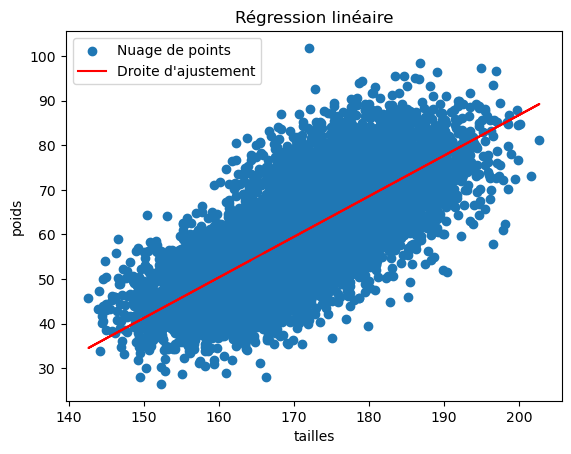

In [35]:
import matplotlib.pyplot as plt

n = len(tailles)
Sx = sum(tailles)
Sy = sum(poids)
Sxx = sum(x*x for x in tailles)
Sxy = sum(tailles[i] * poids[i] for i in range(n))

a = (n*Sxy - Sx*Sy) / (n*Sxx - Sx*Sx)
b = (Sy - a*Sx) / n

print("a =", a)
print("b =", b)

plt.scatter(tailles, poids, label='Nuage de points')
plt.plot(tailles, [a * x + b for x in tailles], color='red', label='Droite d\'ajustement')

plt.xlabel('tailles')
plt.ylabel('poids')
plt.title('Régression linéaire')
plt.legend()

plt.show()


#### Interprétation des résultats de la régression linéaire

Avec les valeurs calculées :

- **a = 0.44675400327667797**
- **b = 40.531526898443424**

---

#### 1. Interprétation de la pente : a = 0.4467…

La pente **a** représente la variation moyenne du poids lorsque la taille augmente d’une unité.

Cela signifie que :

Pour chaque centimètre supplémentaire, le poids augmente en moyenne d’environ **0,45 kg**.

C’est une relation positive mais modérée : la taille influence le poids, mais d’autres facteurs expliquent aussi les variations.

---

#### 2. Interprétation de l’ordonnée à l’origine : b = 40.53…

L’ordonnée à l’origine **b** est la valeur de \(x = 0\) :

Dans ce contexte :

- Cette valeur n’a pas de sens réel, car une taille de 0 cm n’existe pas.
- Mais elle est mathématiquement nécessaire pour définir la droite.

On l’interprète donc comme un paramètre de calibration, pas comme une valeur physique.

---

#### 3. Interprétation globale de la droite

La droite :

f(x) = 0.4467\,x + 40.53

indique que :

- Plus une personne est grande, plus son poids prédit est élevé.
- Le modèle estime un poids moyen en fonction de la taille.
- Le lien est **positif**, cohérent, mais non parfait (confirmé par r ≈ 0.68).

---

#### Conclusion

- La pente positive **a ≈ 0.447** montre une relation croissante entre taille et poids.  
- L’ordonnée **b ≈ 40.53** est un paramètre mathématique sans sens physique.  
- Le modèle décrit une tendance générale mais comporte des limites, ce que confirme la corrélation r ≈ 0.68.

